In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
# pip install pandas_profiling
import pandas_profiling

In [2]:
credit = pd.read_excel('C:/Data Sets/(Class 21-Python - Case Study)/1. Predicting Credit Card Spend & Identifying Key Drivers/Data Set.xlsx')

### Data Inspection

In [3]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
credit.tail()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,...,1,0,0,0,0,0,1,0,0,0
4996,4699-LEPCCE-3UD,3,3.0,0,51,5,May,14,2,1,...,1,0,0,0,0,0,0,0,0,0
4997,8485-LLUICH-CVV,4,5.0,0,75,6,August,17,4,1,...,1,1,0,0,0,0,1,0,0,0
4998,9325-URAAUT-7FA,1,1.0,0,47,4,December,19,4,2,...,1,0,1,1,1,0,1,0,0,0
4999,8027-EXDZBF-OGR,3,5.0,1,41,4,May,10,1,5,...,1,0,0,0,0,0,0,0,0,0


In [5]:
pd.set_option('display.large_repr', 'truncate')
pd.set_option('display.max_columns', 0)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [7]:
credit.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,54.759600,3.699909,2.392200,9.954160,1.857326,-0.130454,3.654460,0.696915,0.23420,2.964200,0.480200,6.112800,0.641400,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,23.232580,1.389400,0.221000,0.361000,2.996200,1.973400,25.345538,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,...,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,337.202520,160.876110,0.466000,2.05860,38.204800,0.253200,13.471450,2.288779,708.871753,5.611298,0.475600,13.264450,3.243230,577.832510,6.584783,0.340800,12.991310,3.600238,470.176400,6.747296,0.716200,15.443850,2.909733,720.478391,6.426309,0.26880,10.701190,3.605001,421.984610,6.808132,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,19.645000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,55.377511,0.747072,1.221261,6.399783,3.415732,1.273058,5.395172,1.128578,0.42354,1.379456,0.499658,7.743518,1.886775,1.393977,3.414497,0.860783,0.796084,0.494227,0.325776,0.568798,0.469545,3.074801,0.48296,0.91673,12.397484,1.319987,1.307473,0.654898,0.651526,21.231637,

In [ ]:
profile_report = pandas_profiling.ProfileReport(credit)
profile_report

In [24]:
#Pandas profiling check.

profile_report.to_file(output_file = 'C:/Data Sets/(Class 21-Python - Case Study)/1. Predicting Credit Card Spend & Identifying Key Drivers/profile_report.html')

### User Defined Functions

In [8]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [9]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [10]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [11]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [12]:
#Separating Categorical and Continous variables

credit_conti_vars = credit.select_dtypes(include = ['float64', 'int64'])
credit_cat_vars = credit.select_dtypes(include = ['object'])

In [13]:
#Summarising data for checking of null values and outlier check
credit_conti_vars.apply(continuous_var_summary)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
N,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4.997000e+03,4997.000000,5000.000000,5000.000000,2378.000000,5.000000e+03,2378.000000,5000.000000,5000.000000,1704.000000,5.000000e+03,1704.000000,5000.000000,5000.000000,3581.000000,4.998000e+03,3578.000000,5000.000000,5000.000000,1344.000000,5.000000e+03,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
NMISS,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,3.000000,0.000000,0.000000,2622.000000,0.000000e+00,2622.000000,0.000000,0.000000,3296.000000,0.000000e+00,3296.000000,0.000000,0.000000,1419.000000,2.000000e+00,1422.000000,0.000000,0.000000,3656.000000,0.000000e+00,3656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,15007.000000,13431.000000,2518.000000,235128.000000,21194.000000,72715.000000,13360.000000,13764.000000,756.000000,48652.000000,14663.00000,738.000000,273798.000000,18499.546992,11961.000000,49770.800000,9286.628229,-652.137155,18272.300771,3483.879384,1171.000000,14821.000000,2401.000000,30564.000000,3207.000000,11020.000000,1

In [14]:
credit_cat_vars.apply(categorical_var_summary)

,custid,birthmonth
N,5000,5000
NMISS,0,0
MODE,5060-SERQNE-ND1,September
FREQ,1,458
PERCENT,0.02,9.16


In [15]:
#Checking our y variable

credit_conti_vars.cardspent #Primary Card
credit_conti_vars.card2spent #Secondary Card

0        67.80
1        34.94
2       175.75
3        18.42
4       252.73
         ...  
4995    553.56
4996    155.54
4997    643.67
4998    371.60
4999    138.14
Name: card2spent, Length: 5000, dtype: float64

## Data Cleaning

In [16]:
# Handling Outliers
credit_conti_vars = credit_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [17]:
#Null values imputation which we will work on after removing irrelevant variables.
#credit_conti_vars = credit_conti_vars.apply(missing_imputation)
#credit_cat_vars = credit_cat_vars.apply(missing_imputation)

In [18]:
credit_cat_vars #We will not consider these feature variables due to high cardinality and no significance.

,custid,birthmonth
0,3964-QJWTRG-NPN,September
1,0648-AIPJSP-UVM,May
2,5195-TLUDJE-HVO,June
3,4459-VLPQUH-3OL,May
4,8158-SMTQFB-CNO,July
...,...,...
4995,3675-GZFGOT-QJN,January
4996,4699-LEPCCE-3UD,May
4997,8485-LLUICH-CVV,August
4998,9325-URAAUT-7FA,December


In [19]:
credit_conti_vars.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31.0,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,...,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,22,2,17,4,2,0,0,1,0,15.0,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,...,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,67,6,14,2,2,0,16,5,0,35.0,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,...,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,23,2,16,3,2,0,0,1,0,20.0,2.995732,1,5.7,0.033160,-3.401690,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,...,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,26,3,16,3,2,0,1,1,0,23.0,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,...,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [20]:
credit_conti_vars.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.00000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.544200,2.672000,2.7528,0.15120,9.698000,2.9326,0.147600,53.629900,3.697049,2.392200,9.914120,1.758369,-0.127780,3.522506,0.698386,0.23420,2.964200,0.480200,6.095400,0.641400,2.194200,3.049200,0.490400,0.382800,0.106000,0.05000,0.102800,0.022600,1.834800,0.62960,1.84260,16.36640,3.272000,2.127600,0.641400,0.343800,23.202230,1.389400,0.221000,0.361000,2.996200,1.973400,25.332233,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,...,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,333.624477,158.601516,0.466000,2.05860,38.20540,0.253200,13.27264,2.288612,694.322373,5.612272,0.475600,13.140075,3.242727,570.130195,6.585937,0.340800,12.908715,3.599725,463.398395,6.747846,0.716200,15.266950,2.909082,707.239096,6.429558,0.26880,10.53027,3.604226,409.960020,6.808151,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,19.62660,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.242553,1.211738,1.7379,0.35828,9.581689,1.4533,0.354739,46.567698,0.738495,1.221261,6.241691,2.380681,1.241398,4.221760,1.104530,0.42354,1.379456,0.499658,7.709565,1.886775,1.361491,3.351213,0.822462,0.754969,0.462609,0.27334,0.483196,0.209995,3.031262,0.48296,0.91673,12.29787,1.319987,1.297249,0.654898,0.651526,21.129844,1.081296,0.609

In [21]:
#Creating Derived Variables of y variable

credit_conti_vars['total_spend'] = credit_conti_vars.cardspent + credit_conti_vars.card2spent

In [22]:
#Removing card1spent and card2spent

credit_conti_vars.drop(['cardspent','card2spent'], axis = 1, inplace = True)

In [23]:
#Checking the skewness of data
credit_conti_vars.total_spend.skew()

1.5894956724921987

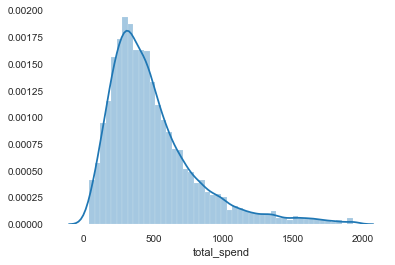

In [24]:
# Very first assumtion is that all the variables should be normally distributed, however that can't be possible
# However we have to be atleast strict about the dependant Y variable

# Distribution of variables
sns.distplot(credit_conti_vars.total_spend)
plt.show()
# this distribution is highly skewed

# Notes: 
#-----------------------------------------------------
# 1. if we get skewed data, then we have to transform the data and there are multiple methods to go about it
# 2. most commonly used and which works on most of the data is log transformation
# 3. Ideally we can do this for each of the dependant variable as well, 
#    however it will depend on amount of data and the amount of analytical rigour
# 4. In no case we can proceed if dependant variable is not normal/near to normal distributed

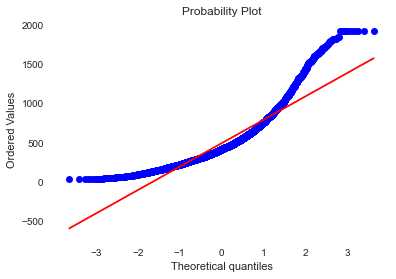

In [25]:
import pylab

stats.probplot(credit_conti_vars.total_spend, dist="norm", plot=pylab )
pylab.show()

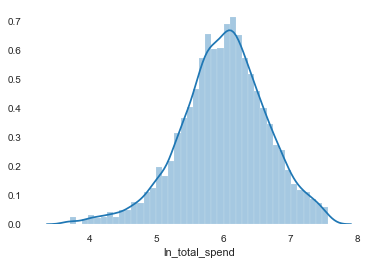

-0.33838713901193473

In [26]:
# Note: good practice is to take the log of the data plus 1, bcoz we don't have log of zero defined
# In thios data its not required as sales are always greater than zero

# apply log transformation: log is rescalling the data and making the distribution normal
credit_conti_vars['ln_total_spend'] = np.log(credit_conti_vars['total_spend'])

# Distribution of variables
sns.distplot(credit_conti_vars.ln_total_spend)
plt.show()

credit_conti_vars.ln_total_spend.skew()

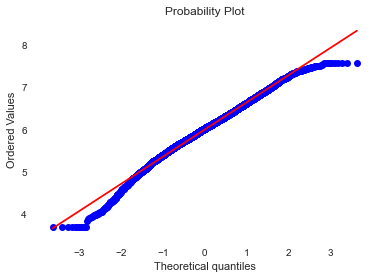

In [27]:
stats.probplot(credit_conti_vars.ln_total_spend, dist="norm", plot=pylab )
pylab.show()

In [28]:
#Corelation check to remove multicollinear and insignificant variables.
#log of functions and normal functions tend to be highly corelated so I am removing the log variables to remove multicollinearity.
#Also filtering all the highly corelated variables.
credit_conti_vars.apply(continuous_var_summary)

print(stats.pearsonr(credit_conti_vars.income, credit_conti_vars.lninc))
print(stats.pearsonr(credit_conti_vars.income, credit_conti_vars.inccat))
print(stats.pearsonr(credit_conti_vars.address, credit_conti_vars.addresscat))
print(stats.pearsonr(credit_conti_vars.ed, credit_conti_vars.edcat))
print(stats.pearsonr(credit_conti_vars.edcat, credit_conti_vars.jobcat))
print(stats.pearsonr(credit_conti_vars.employ, credit_conti_vars.empcat))
print(stats.pearsonr(credit_conti_vars.spoused,credit_conti_vars.spousedcat))
print(stats.pearsonr(credit_conti_vars.creddebt,credit_conti_vars.debtinc))
print(stats.pearsonr(credit_conti_vars.othdebt,credit_conti_vars.lnothdebt))
print(stats.pearsonr(credit_conti_vars.edcat,credit_conti_vars.spousedcat))
print(stats.pearsonr(credit_conti_vars.ed,credit_conti_vars.spoused))
print(stats.pearsonr(credit_conti_vars.homeown, credit_conti_vars.hometype))
print(stats.pearsonr(credit_conti_vars.carvalue, credit_conti_vars.carcatvalue))
print(stats.pearsonr(credit_conti_vars.commute, credit_conti_vars.commutecat))

(0.8981722095294393, 0.0)
(0.8907021365773702, 0.0)
(0.9271686386442936, 0.0)
(0.9664891423675179, 0.0)
(-0.06900235035563557, 1.0405820901805678e-06)
(0.9035909382449576, 0.0)
(0.9831475511405918, 0.0)
(0.4625981123873055, 1.1273637631364874e-263)


ValueError: array must not contain infs or NaNs

In [29]:
credit_conti_vars.apply(continuous_var_summary)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
N,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4.997000e+03,4997.000000,5000.000000,5000.000000,2378.000000,5.000000e+03,2378.000000,5000.000000,5000.000000,1704.000000,5.000000e+03,1704.000000,5000.000000,5000.000000,3581.000000,4.998000e+03,3578.000000,5000.000000,5000.000000,1344.000000,5.000000e+03,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
NMISS,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,3.000000,0.000000,0.000000,2622.000000,0.000000e+00,2622.000000,0.000000,0.000000,3296.000000,0.000000e+00,3296.000000,0.000000,0.000000,1419.000000,2.000000e+00,1422.000000,0.000000,0.000000,3656.000000,0.000000e+00,3656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUM,15007.000000,13431.000000,2518.000000,235128.000000,21194.000000,72721.000000,13360.000000,13764.000000,756.000000,48490.000000,14663.00000,738.000000,268149.500000,18485.246078,11961.000000,49570.600000,8791.844708,-638.770486,17612.530669,3491.232703,1171.000000,14821.000000,2401.000000,30477.000000,3207.000000,10971.00

In [30]:
credit_conti_vars.head(10)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31.0,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,...,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.00,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.007029
1,5,5.0,0,22,2,17,4,2,0,0,1,0,15.0,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,...,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.00,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,4.350794
2,3,4.0,1,67,6,14,2,2,0,16,5,0,35.0,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,...,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,5.886021
3,4,3.0,0,23,2,16,3,2,0,0,1,0,20.0,2.995732,1,5.7,0.033160,-3.401690,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,...,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.884464
4,2,2.0,0,26,3,16,3,2,0,1,1,0,23.0,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,...,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.50,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,6.230147
5,4,4.0,0,64,5,17,4,3,0,22,5,0,107.0,4.672829,4,5.6,1.060584,0.058820,4.931416,1.595626,0,2,0,-1,-1,1,11,1,1,0,0,2,0,7,1,1,31,5,0,-1,-1,-1.0,-1,-1,0,8,4,23.0,0,0,0,0,1,0,0,1,0,0,9,4,...,5,3,3,2,1,9,3,0,3,28,0,8.10,2.091864,264.90,5.579352,1,26.75,3.286534,726.60,6.588376,1,35.50,3.569533,970.95,6.878275,1,28.25,3.341093,765.0,6.639876,0,0.00,NaN,0.00,NaN,0,0,1,0,1,1,1,1,0,1,21,1,1,1,1,0,0,0,0,0,0,1,0,228.27,5.430529
6,2,5.0,1,52,5,14,2,1,0,10,3,0,77.0,4.343805,4,1.9,0.501809,-0.689536,0.961191,-0.039582,0,2,0,-1,-1,1,2,0,2,0,0,0,0,0,0,3,21,4,2,1,0,25.6,2,1,0,4,3,32.0,1,0,0,1,0,0,1,1,0,0,9,4,...,2,2,3,4,0,2,2,0,2,15,0,3.80,1.335001,44.80,3.802208,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,0,0.00,NaN,0.00,NaN,0,0,0,1,0,0,1,0,0,1,19,1,1,1,0,1,1,0,0,0,0,0,0,952.46,6.859048
7,3,4.0,1,44,4,16,3,1,0,11,4,0,97.0,4.574711,4,14.4,5.950368,1.783453,8.017632,2.081643,0,5,1,15,3,2,10,0

In [33]:
#Removing all multi collinear , categorical which are numerical and null and log values first.

#credit_conti_vars.drop(['agecat','edcat','empcat','lninc','inccat','lncreddebt','lnothdebt','spousedcat','addresscat','carcatvalue','card2tenurecat','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon','lnwireten','polparty','polcontrib'], axis =1, inplace = True)
#credit_conti_vars.drop(['polparty','polcontrib'], axis =1, inplace = True)
credit_conti_vars.drop(['commutecat'], axis =1, inplace = True)

In [34]:
credit_conti_vars.apply(continuous_var_summary)

,region,townsize,gender,age,ed,jobcat,union,employ,retire,income,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,cars,carown,cartype,carvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
N,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4.997000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,4.998000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
NMISS,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUM,15007.000000,13431.000000,2518.000000,235128.000000,72721.000000,13764.000000,756.000000,48490.000000,738.000000,268149.500000,49570.600000,8791.844708,17612.530669,1171.000000,14821.000000,2401.000000,30477.000000,10971.000000,15246.000000,2452.000000,1914.000000,530.000000,250.000000,514.000000,113.000000,9174.000000,3148.00000,9213.000000,81832.000000,10638.000000,3207.000000,1719.000000,116011.150000,1105.000000,1805.000000,14981.000000,126610.500000,3395.000000,513.000000,1359.000000,2030.000000,1373.000000,477.000000,617.000000,1919.000000,292.000000,940.000000,38184.000000,20443.000000,2590.000000,13571.000000,12535.000000,12529.000000,949.000000,83279.000000,18911.000000,13872.000000,12706.000000,12670.000000,936.000000,65422.000000,2330.000000,10293.000000,191027.000000,1266.000000,66363.200000,3.469529e+06,2378.000000,65700.375000,2.8506

In [35]:
credit_conti_vars

,region,townsize,gender,age,ed,jobcat,union,employ,retire,income,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,cars,carown,cartype,carvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
0,1,2.0,1,20,15,1,1,0,0,31.0,11.1,1.200909,2.240091,1,1,0,-1,3,0,0,0,0,0,0,0,0,0,2,0,2,1,0,14.300,0,0,8,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,3,1,1,0,2,2,5,3,1,0,3,0,3,5,1,6.50,34.40,1,29.0,161.05,1,29.50,126.10,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.007029
1,5,5.0,0,22,17,2,0,0,0,15.0,18.6,1.222020,1.567980,1,1,0,-1,2,6,0,0,0,0,0,0,6,1,3,2,2,1,1,6.800,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,0,2,4,1,0,4,2,4,1,3,0,4,1,1,39,0,8.90,330.60,0,0.0,0.00,1,54.85,1975.00,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,4.350794
2,3,4.0,1,67,14,2,0,16,0,35.0,9.9,0.928620,2.536380,0,4,1,13,3,3,2,1,0,0,0,0,0,1,1,30,3,1,1,18.800,0,1,4,24.0,1,0,1,1,1,0,0,0,0,0,2,5,0,2,1,4,0,35,5,4,1,3,0,25,0,3,65,0,28.40,1858.35,0,0.0,0.00,0,0.00,0.00,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,5.886021
3,4,3.0,0,23,16,2,0,0,0,20.0,5.7,0.033160,1.117200,1,2,1,18,5,0,0,0,0,0,0,0,0,1,3,3,3,1,1,8.700,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,2,1,4,0,5,2,3,2,4,0,5,1,1,36,0,6.00,199.45,0,0.0,0.00,0,0.00,0.00,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.884464
4,2,2.0,0,26,16,2,0,1,0,23.0,1.7,0.214659,0.176341,0,1,1,13,4,0,0,0,0,0,0,0,0,0,2,3,1,0,1,10.600,0,1,6,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,4,2,1,0,8,3,1,3,2,0,9,1,3,21,0,3.05,74.10,1,16.5,387.70,0,0.00,0.00,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,68,10,1,0,24,0,196.0,8.0,7.934080,7.745920,0,1,0,-1,1,4,3,0,0,0,0,0,0,1,1,24,1,1,0,64.500,0,0,5,21.0,0,0,0,0,1,0,0,0,0,0,9,4,1,1,3,3,0,35,5,3,3,4,0,28,0,2,69,0,34.10,2405.90,0,0.0,0.00,0,0.00,0.00,1,21.75,1565.0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1,19,1,1,1,0,0,0,0,0,1,0,0,0,1425.67,7.262397
4996,3,3.0,0,51,14,1,0,6,0,83.0,15.0,3.336600,9.113400,1,5,0,-1,1,1,0,0,0,0,0,0,1,1,1,12,2,1,1,40.000,1,1,4,26.0,1,0,0,1,0,1,0,0,0,0,9,4,0,3,4,4,0,15,4,5,1,2,0,13,1,1,30,0,10.40,289.00,1,36.5,1157.20,0,0.00,0.00,1,26.25,800.0,1,27.90,757.35,0,0,0,0,1,1,1,1,0,1,14,1,1,1,0,0,0,0,0,0,0,0,0,366.35,5.903589
4997,4,5.0,0,75,17,1,0,24,0,108.0,10.8,3.557520,8.106480,0,3,0,-1,1,0,0,0,0,0,0,0,0,1,3,48,3,1,0,53.600,1,0,1,32.0,1,0,1,1,0,0,0,1,0,0,9,4,0,1,3,1,0,40,5,2,4,4,0,29,0,3,72,0,29.40,2109.25,1,44.0,3322.50,0,0.00,0.00,1,15.25,1070.0,0,0.00,0.00,1,0,0,0,1,1,1,1,0,1,16,1,1,1,1,0,0,0,0,1,0,0,0,1527.75,7.331551
4998,1,1.0,0,47,19,2,0,3,0,189.0,10.8,5.021352,15.390648,1,4,1,15,4,0,0,0,0,0,0,0,0,1,1,16,2,1,1,92.001,1,1,1,13.0,1,0,0,0,1,0,0,0,0,0,9,2,0,3,1,1,0,22,5,4,3,1,0,15,0,3,37,0,7.95,282.70,0,0.0,0.00,1,29.55,1032.85,1,9.50,345.0,0,0.00,0.00,1,0,0,3,0,0,0,0,1,1,24,1,1,1,0,1,1,1,0,1,0,0,0,

In [36]:
#Null values imputation which we will work on after removing irrelevant variables.
credit_conti_vars = credit_conti_vars.apply(missing_imputation)
credit_cat_vars = credit_cat_vars.apply(missing_imputation)

In [37]:
credit_conti_vars.apply(continuous_var_summary)

,region,townsize,gender,age,ed,jobcat,union,employ,retire,income,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,cars,carown,cartype,carvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
N,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUM,15007.000000,13436.374550,2518.000000,235128.000000,72721.000000,13764.000000,756.000000,48490.000000,738.000000,268149.500000,49570.600000,8791.844708,17612.530669,1171.000000,14821.000000,2401.000000,30477.000000,10971.000000,15246.000000,2452.000000,1914.000000,530.000000,250.000000,514.000000,113.000000,9174.000000,3148.00000,9213.000000,81832.000000,10638.000000,3207.000000,1719.000000,116011.150000,1105.000000,1805.000000,14981.000000,126661.164466,3395.000000,513.000000,1359.000000,2030.000000,1373.000000,477.000000,617.000000,1919.000000,292.000000,940.000000,38184.000000,20443.000000,2590.000000,13571.000000,12535.000000,12529.000000,949.000000,83279.000000,18911.000000,13872.000000,12706.000000,12670.000000,936.000000,65422.000000,2330.000000,10293.000000,191027.000000,1266.000000,66363.200000,3.471612e+06,2378.000000,65700.375000,2.8506

In [38]:
credit_conti_vars

,region,townsize,gender,age,ed,jobcat,union,employ,retire,income,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,cars,carown,cartype,carvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
0,1,2.0,1,20,15,1,1,0,0,31.0,11.1,1.200909,2.240091,1,1,0,-1,3,0,0,0,0,0,0,0,0,0,2,0,2,1,0,14.300,0,0,8,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,3,1,1,0,2,2,5,3,1,0,3,0,3,5,1,6.50,34.40,1,29.0,161.05,1,29.50,126.10,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.007029
1,5,5.0,0,22,17,2,0,0,0,15.0,18.6,1.222020,1.567980,1,1,0,-1,2,6,0,0,0,0,0,0,6,1,3,2,2,1,1,6.800,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,0,2,4,1,0,4,2,4,1,3,0,4,1,1,39,0,8.90,330.60,0,0.0,0.00,1,54.85,1975.00,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,4.350794
2,3,4.0,1,67,14,2,0,16,0,35.0,9.9,0.928620,2.536380,0,4,1,13,3,3,2,1,0,0,0,0,0,1,1,30,3,1,1,18.800,0,1,4,24.0,1,0,1,1,1,0,0,0,0,0,2,5,0,2,1,4,0,35,5,4,1,3,0,25,0,3,65,0,28.40,1858.35,0,0.0,0.00,0,0.00,0.00,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,5.886021
3,4,3.0,0,23,16,2,0,0,0,20.0,5.7,0.033160,1.117200,1,2,1,18,5,0,0,0,0,0,0,0,0,1,3,3,3,1,1,8.700,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,2,1,4,0,5,2,3,2,4,0,5,1,1,36,0,6.00,199.45,0,0.0,0.00,0,0.00,0.00,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.884464
4,2,2.0,0,26,16,2,0,1,0,23.0,1.7,0.214659,0.176341,0,1,1,13,4,0,0,0,0,0,0,0,0,0,2,3,1,0,1,10.600,0,1,6,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,4,2,1,0,8,3,1,3,2,0,9,1,3,21,0,3.05,74.10,1,16.5,387.70,0,0.00,0.00,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,68,10,1,0,24,0,196.0,8.0,7.934080,7.745920,0,1,0,-1,1,4,3,0,0,0,0,0,0,1,1,24,1,1,0,64.500,0,0,5,21.0,0,0,0,0,1,0,0,0,0,0,9,4,1,1,3,3,0,35,5,3,3,4,0,28,0,2,69,0,34.10,2405.90,0,0.0,0.00,0,0.00,0.00,1,21.75,1565.0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1,19,1,1,1,0,0,0,0,0,1,0,0,0,1425.67,7.262397
4996,3,3.0,0,51,14,1,0,6,0,83.0,15.0,3.336600,9.113400,1,5,0,-1,1,1,0,0,0,0,0,0,1,1,1,12,2,1,1,40.000,1,1,4,26.0,1,0,0,1,0,1,0,0,0,0,9,4,0,3,4,4,0,15,4,5,1,2,0,13,1,1,30,0,10.40,289.00,1,36.5,1157.20,0,0.00,0.00,1,26.25,800.0,1,27.90,757.35,0,0,0,0,1,1,1,1,0,1,14,1,1,1,0,0,0,0,0,0,0,0,0,366.35,5.903589
4997,4,5.0,0,75,17,1,0,24,0,108.0,10.8,3.557520,8.106480,0,3,0,-1,1,0,0,0,0,0,0,0,0,1,3,48,3,1,0,53.600,1,0,1,32.0,1,0,1,1,0,0,0,1,0,0,9,4,0,1,3,1,0,40,5,2,4,4,0,29,0,3,72,0,29.40,2109.25,1,44.0,3322.50,0,0.00,0.00,1,15.25,1070.0,0,0.00,0.00,1,0,0,0,1,1,1,1,0,1,16,1,1,1,1,0,0,0,0,1,0,0,0,1527.75,7.331551
4998,1,1.0,0,47,19,2,0,3,0,189.0,10.8,5.021352,15.390648,1,4,1,15,4,0,0,0,0,0,0,0,0,1,1,16,2,1,1,92.001,1,1,1,13.0,1,0,0,0,1,0,0,0,0,0,9,2,0,3,1,1,0,22,5,4,3,1,0,15,0,3,37,0,7.95,282.70,0,0.0,0.00,1,29.55,1032.85,1,9.50,345.0,0,0.00,0.00,1,0,0,3,0,0,0,0,1,1,24,1,1,1,0,1,1,1,0,1,0,0,0,

In [39]:
len(credit_conti_vars.columns)

104

In [40]:
#Adding nominal categorical features to create dummies

# for c_feature in categorical_features
for c_feature in ['jobcat', 'homeown','carown','cartype','commute','reason','card','cardbenefit','card2','card2benefit','bfast','internet']:
    credit_conti_vars[c_feature] = credit_conti_vars[c_feature].astype('category')
    credit_conti_vars = create_dummies(credit_conti_vars, c_feature)
    

In [41]:
#Final data set made with dummies for data analysis and machine learning.

credit_final = credit_conti_vars

In [42]:
len(credit_final.columns)

135

In [43]:
#Correlation matrix to check degree of corelation.

credit_final.corr()

,region,townsize,gender,age,ed,union,employ,retire,income,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,hometype,address,cars,carvalue,carbought,carbuy,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polview,vote,cardtype,cardfee,cardtenure,cardtenurecat,card2type,card2fee,card2tenure,active,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,...,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,homeown_1,carown_0,carown_1,cartype_0,cartype_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
region,1.000000,0.414030,-0.012810,-0.026525,0.013850,-0.013768,-0.010204,-0.042849,0.036594,-0.006781,0.007582,0.032081,-0.006856,0.015631,0.056498,0.052967,0.045743,-0.012442,-0.021116,0.020746,0.001599,-0.008931,0.023959,0.022004,-0.021205,0.017052,-0.004960,0.016280,0.040197,0.009806,-0.009821,0.188741,-0.011979,0.011722,-0.017045,0.051611,0.055818,0.062416,0.101007,0.099317,0.126942,-0.023519,0.000241,-0.011157,0.012007,-0.028101,-0.000604,0.004212,-0.007267,0.003134,0.002166,0.002182,0.005033,-0.002515,0.010870,0.005927,0.013429,0.011870,0.006683,0.023631,...,0.009908,0.032778,0.006338,0.022061,0.011319,0.048589,0.040228,0.020596,0.007504,0.026391,0.036622,0.012312,-0.013004,0.005899,0.005694,0.043054,0.039421,0.006803,0.017984,-0.011378,0.001652,-0.010603,0.045620,-0.016171,0.019204,-0.001469,0.006485,-0.021308,-0.039056,-0.007136,-0.001431,0.024009,0.029306,0.078865,0.055778,-0.033665,0.000854,-0.012033,-0.018787,-0.002395,-0.010973,-0.011753,0.024155,-0.017251,0.004662,0.025576,-0.031109,-0.011166,0.003793,0.005834,-0.001378,-0.024497,0.010364,0.008733,-0.025937,0.022485,-0.011312,0.017262,0.011343,0.008395
townsize,0.414030,1.000000,0.009489,-0.075454,0.002901,-0.019809,-0.059279,-0.065867,-0.009513,-0.019571,-0.039217,-0.014550,0.023588,-0.031187,0.029919,0.026035,0.044416,-0.001123,-0.018790,0.031583,-0.012798,0.009846,0.001667,0.020940,-0.007077,-0.003136,-0.042024,0.003619,0.001964,0.001123,0.009101,0.487009,-0.031945,-0.004888,-0.016716,0.131766,0.116960,0.100376,0.186823,0.260841,0.297547,-0.021559,0.001338,-0.005435,-0.000234,-0.007594,-0.042067,-0.033750,0.001746,-0.028879,-0.040056,0.022788,-0.029870,0.000838,-0.017098,-0.021800,0.000660,-0.016274,-0.020592,-0.006343,...,-0.008312,0.026502,-0.002381,-0.004527,0.016431,0.020692,0.022748,0.002663,0.005330,0.007894,-0.000636,-0.028673,-0.006225,-0.010036,-0.007200,-0.007873,0.007386,0.020880,-0.004011,-0.004667,-0.016463,-0.002508,0.024066,-0.013835,0.017297,0.022587,-0.017599,-0.032945,-0.086784,0.026527,0.035009,0.028182,0.047346,0.161046,0.099096,-0.067738,0.006705,0.023558,0.006689,-0.006251,-0.013630,-0.004182,0.016137,0.023398,-0.004123,0.026213,-0.015907,-0.003984,0.002351,-0.002735,0.012118,-0.020187,0.016002,0.015490,-0.052081,0.033830,-0.019763,-0.007458,-0.012535,0.022101
gender,-0.012810,0.009489,1.000000,-0.010186,-0.000777,0.000311,-0.011756,-0.021040,-0.001949,0.004746,-0.006574,-0.008475,-0.001620,0.001782,0.003888,0.001494,0.031148,0.028664,0.013703,-0.013189,0.024293,0.006001,0.012543,0.003988,0.024280,0.003200,-0.013454,0.014403,-0.007357,0.005597,0.011662,0.009937,0.031083,-0.001775,0.003244,-0.028760,0.002292,-0.007104,0.013718,0.019405,0.005030,-0.006536,0.024776,-0.036284,-0.023830,0.018446,-0.020111,-0.006377,0.018686,0.006799,-0.013578,0.021340,-0.009466,-0.013391,-0.027644,-0.025813,-0.010862,-0.017373,-0.012015,0.011702,...,

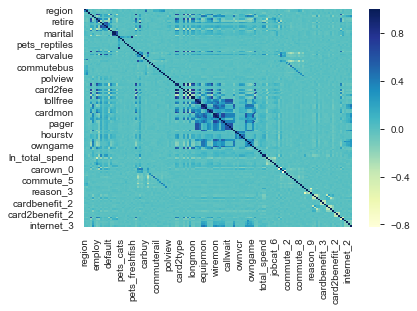

<Figure size 1440x1080 with 0 Axes>

In [44]:
sns.heatmap(credit_final.corr(),cmap="YlGnBu")
plt.figure(figsize=(20,15))
plt.show()

In [65]:
#Significant variables and multicollinearity check

#F-Regression

from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

F_regression_output = pd.concat( [pd.Series(train_X.columns), pd.Series(F_values), pd.Series(p_values).round(4)], axis = 1 )
F_regression_output.columns = ['Column_Name', 'F_score', 'P_value']
#F_regression_output.head()

F_regression_output

features = list(F_regression_output.loc[F_regression_output.P_value <= 0.1, 'Column_Name'])
features

['card2_2',
 'card2_3',
 'card2_4',
 'card2_5',
 'card2benefit_3',
 'card_2',
 'card_3',
 'card_4',
 'card_5',
 'carown_0',
 'carown_1',
 'commutecar',
 'creddebt',
 'forward',
 'gender',
 'internet_3',
 'internet_4',
 'jobcat_2',
 'jobcat_3',
 'jobcat_4',
 'owncd',
 'owndvd',
 'owntv',
 'ownvcr',
 'reason_2',
 'reason_4',
 'reason_9',
 'response_03',
 'retire',
 'voice']

Feature selection using RFE

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
rfe = RFE(linreg,  n_features_to_select= 40, verbose = 10)

rfe = rfe.fit(credit_final[feature_columns],credit_final['ln_total_spend'] )

print(rfe.support_)
print(rfe.ranking_)

Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
F

In [53]:
X_final = credit_final[feature_columns[rfe.support_]]
y_final = credit_final['ln_total_spend']

In [54]:
X_final

,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,card_5,carown_0,carown_1,cartype_0,cartype_1,commute_2,commute_6,commute_8,commutecar,creddebt,forward,gender,internet_3,internet_4,jobcat_2,jobcat_3,jobcat_4,jobcat_5,owncd,owndvd,owntv,ownvcr,pets_reptiles,pets_saltfish,reason_2,reason_3,reason_4,reason_9,response_03,retire,union,voice
0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1.200909,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1.222020,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0.928620,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0.033160,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.214659,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,7.934080,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4996,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,3.336600,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,3.557520,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4998,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,5.021352,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0


# Multi Collinearity Check - VIF

In [55]:
#Selecting significant variables
feature = credit_final[feature_columns[rfe.support_]].columns
model_param = 'ln_total_spend ~ ' + ' + '.join(feature)

In [56]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(model_param,credit_final, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
features = list(vif.round(1).sort_values(by = 'VIF Factor', ascending = False).loc[:, 'Features'])
features

vif

#print(stats.pearsonr(credit_final.carown_0, credit_final.cartype_0))
#print(stats.pearsonr(credit_final.carown_1, credit_final.cartype_1))

#4 variables giving VIF Factor as inf

#All are below 3 so no X variables are highly collinear and we can go with our analysis.

C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF Factor
0,Intercept,103.966844
1,card2_2,2.081495
2,card2_3,2.156154
3,card2_4,2.283932
4,card2_5,1.434462
5,card2benefit_3,1.007138
6,card_2,1.949312
7,card_3,1.926942
8,card_4,2.197965
9,card_5,1.251183


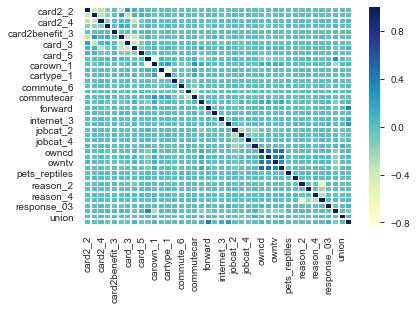

In [57]:
#Corelation check of the new variables

sns.heatmap(X_final.corr(), cmap="YlGnBu", linewidths=0.5)

# Splitting the data for prediction

In [58]:
from sklearn.model_selection import train_test_split

feature_columns = credit_final.columns.difference(['total_spend','ln_total_spend'])

In [59]:
feature_columns

Index(['active', 'address', 'age', 'bfast_2', 'bfast_3', 'callcard', 'callid',
       'callwait', 'carbought', 'carbuy',
       ...
       'tollfree', 'tollmon', 'tollten', 'townsize', 'union', 'voice', 'vote',
       'wireless', 'wiremon', 'wireten'],
      dtype='object', length=133)

In [60]:
X_final

,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,card_5,carown_0,carown_1,cartype_0,cartype_1,commute_2,commute_6,commute_8,commutecar,creddebt,forward,gender,internet_3,internet_4,jobcat_2,jobcat_3,jobcat_4,jobcat_5,owncd,owndvd,owntv,ownvcr,pets_reptiles,pets_saltfish,reason_2,reason_3,reason_4,reason_9,response_03,retire,union,voice
0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1.200909,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1.222020,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0.928620,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0.033160,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.214659,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,7.934080,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4996,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,3.336600,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,3.557520,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
4998,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,5.021352,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0


In [61]:
y_final

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Name: ln_total_spend, Length: 5000, dtype: float64

In [62]:
train_X, test_X, train_y, test_y = train_test_split(X_final, y_final,test_size = 0.3, random_state = 12345)

In [63]:
# method 2: divide the data into training and testing
train, test = train_test_split(credit_final, test_size = 0.3, random_state = 12345)

In [66]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  3500  |  No of obs in testing:  1500


# Model Building

In [67]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
model_param

'ln_total_spend ~ card2_2 + card2_3 + card2_4 + card2_5 + card2benefit_3 + card_2 + card_3 + card_4 + card_5 + carown_0 + carown_1 + cartype_0 + cartype_1 + commute_2 + commute_6 + commute_8 + commutecar + creddebt + forward + gender + internet_3 + internet_4 + jobcat_2 + jobcat_3 + jobcat_4 + jobcat_5 + owncd + owndvd + owntv + ownvcr + pets_reptiles + pets_saltfish + reason_2 + reason_3 + reason_4 + reason_9 + response_03 + retire + union + voice'

In [69]:
lm1 = smf.ols(model_param, train).fit()

In [70]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     40.09
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          1.02e-246
Time:                        08:10:26   Log-Likelihood:                -2780.3
No. Observations:                3500   AIC:                             5641.
Df Residuals:                    3460   BIC:                             5887.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.4913      0.090     72.

# Calculating R2 with 25 variables

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
rfe = RFE(linreg,  n_features_to_select= 25, verbose = 10)

rfe = rfe.fit(credit_final[feature_columns],credit_final['ln_total_spend'] )

print(rfe.support_)
print(rfe.ranking_)

Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
F

In [72]:
X_final1 = credit_final[feature_columns[rfe.support_]]
y_final1 = credit_final['ln_total_spend']

#Selecting significant variables
feature = credit_final[feature_columns[rfe.support_]].columns
model_param = 'ln_total_spend ~ ' + ' + '.join(feature)

# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(model_param,credit_final, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
features = list(vif.round(1).sort_values(by = 'VIF Factor', ascending = False).loc[:, 'Features'])
features

vif

#print(stats.pearsonr(credit_final.carown_0, credit_final.cartype_0))
#print(stats.pearsonr(credit_final.carown_1, credit_final.cartype_1))

#4 variables giving VIF Factor as inf

#All are below 3 so no X variables are highly collinear and we can go with our analysis.

C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF Factor
0,Intercept,96.630522
1,card2_2,2.076350
2,card2_3,2.143778
3,card2_4,2.276978
4,card2_5,1.427373
5,card_2,1.932528
6,card_3,1.904335
7,card_4,2.184470
8,card_5,1.239282
9,carown_0,inf


In [73]:
model_param

'ln_total_spend ~ card2_2 + card2_3 + card2_4 + card2_5 + card_2 + card_3 + card_4 + card_5 + carown_0 + carown_1 + cartype_0 + cartype_1 + internet_4 + jobcat_2 + jobcat_4 + owncd + owndvd + owntv + ownvcr + pets_saltfish + reason_2 + reason_3 + reason_9 + response_03 + retire'

In [74]:
lm2 = smf.ols(model_param, train).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     56.32
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          1.09e-226
Time:                        08:10:30   Log-Likelihood:                -2857.7
No. Observations:                3500   AIC:                             5765.
Df Residuals:                    3475   BIC:                             5919.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.5492      0.089     73.857

In [75]:
# Step 4: predict the spend on the training data
train['pred_spend'] = np.exp(lm1.predict(train))

# Step 5: predict the spend on the testing/validation data
test['pred_spend'] = np.exp(lm1.predict(test))

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [76]:
train[['total_spend', 'pred_spend']].head()

,total_spend,pred_spend
509,848.91,585.747408
3847,613.91,508.517303
3417,525.95,329.327058
382,331.38,317.355806
1345,848.60,329.047912


In [77]:
linreg1 = LinearRegression().fit(train_X,train_y)

In [78]:
linreg1.score(train_X,train_y)

-0.020953336721846627

## Running Models Like Decision Tree Regressor and Random Forest Regressor as they are non parametric and generally perform better than statistical models.

In [83]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor?
y_final = credit_final['total_spend']
train_X, test_X, train_y, test_y = train_test_split(X_final, y_final,test_size = 0.3, random_state = 12345)

pargrid_dt = {'max_features': [5, 6, 7, 8, 9, 10],
                     'min_samples_split':[2,3]
                         ,'min_samples_leaf':[1,2,3]}

gscv_dt = GridSearchCV(DecisionTreeRegressor(random_state = 12345),
                       pargrid_dt, 
                       cv = 10, 
                       verbose = 10, 
                       n_jobs= - 1 )

gscv_results_dt = gscv_dt.fit(train_X,train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1990s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0529s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0798s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  

In [88]:
gscv_results_dt.best_params_

{'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [89]:
gscv_results_dt.best_score_

-0.007552289155988689

In [86]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#We will use the standardised total_sales column as Random Forest is a non parameteric method
y_final = credit_final['total_spend']
train_X, test_X, train_y, test_y = train_test_split(X_final, y_final,test_size = 0.3, random_state = 12345)


In [87]:
pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120, 150, 200,250],
                  'max_features': [5, 6, 7, 8, 9, 10],
                     'min_samples_split':[2,3]
                         ,'min_samples_leaf':[1,2,3]}


gscv_rf = GridSearchCV(RandomForestRegressor(random_state = 12345),
                       pargrid_rf, 
                       cv = 10, 
                       verbose = 10, 
                       n_jobs= - 1 )

gscv_results = gscv_rf.fit(train_X,train_y)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [90]:
gscv_results.best_params_

{'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [91]:
gscv_results.best_score_

0.23082549789325763

In [ ]:
RandomForestRegressor?

In [92]:
# Step 4: predict the spend on the training data
train['pred_spend_rf'] = gscv_rf.predict(train_X)

# Step 5: predict the spend on the testing/validation data
test['pred_spend_rf'] = gscv_rf.predict(test_X)

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [93]:
train[['total_spend', 'pred_spend','pred_spend_rf']].head()

,total_spend,pred_spend,pred_spend_rf
509,848.91,585.747408,736.241499
3847,613.91,508.517303,615.069391
3417,525.95,329.327058,478.141278
382,331.38,317.355806,405.234758
1345,848.60,329.047912,489.574838


In [94]:
test[['total_spend', 'pred_spend','pred_spend_rf']].head()

,total_spend,pred_spend,pred_spend_rf
3183,335.15,262.346571,380.746596
1071,655.48,314.642987,373.467841
2640,344.38,429.839446,528.193631
2282,410.72,331.757372,614.539246
1595,832.93,601.624916,539.618296


# Model Validation

In [95]:
# a) accuracy metrics (a. MAE: Mean Absolute Error)
MAE_train = mean_absolute_error(train.total_spend, train.pred_spend)
MAE_test = mean_absolute_error(test.total_spend, test.pred_spend)

# print the values of MAE for train and test
print('MAE of training data with Linear Regression: ', MAE_train,  ' | ', 'MAE of testing data: ', MAE_test)

MAE of training data with Linear Regression:  191.9953852390103  |  MAE of testing data:  195.52536613557209


In [96]:
# b) accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = np.mean(np.abs(train['total_spend'] - train['pred_spend'])/train['total_spend'])
MAPE_test = np.mean(np.abs(test['total_spend'] - test['pred_spend'])/test['total_spend'])

# print the values of MAPE for train and test
print('MAPE of training data with Linear Regression: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data with Linear Regression:  0.4841885060792035  |  MAPE of testing data:  0.5141401337207094


In [97]:
# c) MSE: Mean squared Error and RMSE: Root Mean Square Error
MSE_train = mean_squared_error(train.total_spend, train.pred_spend)
MSE_test = mean_squared_error(test.total_spend, test.pred_spend)

# print the values of MSE for train and test
print('MSE of training data with Linear Regression: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)

# print the values of RMSE for train and test
print('RMSE of training data with Linear Regression: ', np.sqrt(MSE_train),  ' | ', 'RMSE of testing data: ', np.sqrt(MSE_test))

MSE of training data with Linear Regression:  75706.51371551013  |  MSE of testing data:  74208.1892654112
RMSE of training data with Linear Regression:  275.14816684017745  |  RMSE of testing data:  272.4118008923461


In [98]:
# d.1) Corelation between actual and predicted
Corr_train = stats.pearsonr(train.total_spend, train.pred_spend)
Corr_test = stats.pearsonr(test.total_spend, test.pred_spend)

# print the values of Corelation for train and test
print('Corr of training data: ', Corr_train,  ' | ', 'Corr of testing data: ', Corr_test)

Corr of training data:  (0.555161559428226, 3.210059337642058e-282)  |  Corr of testing data:  (0.5120353303112717, 4.997913695433695e-101)


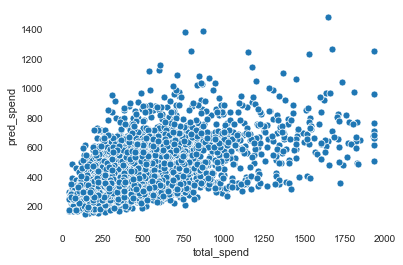

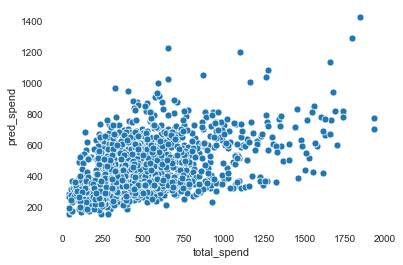

In [99]:
# d.2) Corelation between actual and predicted

sns.scatterplot(train.total_spend, train.pred_spend)
plt.show()

sns.scatterplot(test.total_spend, test.pred_spend)
plt.show()

## Accuracy Metrics using Random Forests

In [100]:
# a) accuracy metrics (a. MAE: Mean Absolute Error)
MAE_train = mean_absolute_error(train.total_spend, train.pred_spend_rf)
MAE_test = mean_absolute_error(test.total_spend, test.pred_spend_rf)

# print the values of MAE for train and test
print('MAE of training data with Random Forest Regressor: ', MAE_train,  ' | ', 'MAE of testing data: ', MAE_test)

MAE of training data with Random Forest Regressor:  158.10463665318682  |  MAE of testing data:  207.03953459800283


In [101]:
# b) accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = np.mean(np.abs(train['total_spend'] - train['pred_spend_rf'])/train['total_spend'])
MAPE_test = np.mean(np.abs(test['total_spend'] - test['pred_spend_rf'])/test['total_spend'])

# print the values of MAPE for train and test
print('MAPE of training data with Random Forest Regressor: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data with Random Forest Regressor:  0.4745577683928624  |  MAPE of testing data:  0.6499140571001859


In [102]:
# c) MSE: Mean squared Error and RMSE: Root Mean Square Error
MSE_train = mean_squared_error(train.total_spend, train.pred_spend_rf)
MSE_test = mean_squared_error(test.total_spend, test.pred_spend_rf)

# print the values of MSE for train and test
print('MSE of training data with Random Forest Regressor: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)

# print the values of RMSE for train and test
print('RMSE of training data with Random Forest Regressor: ', np.sqrt(MSE_train),  ' | ', 'RMSE of testing data: ', np.sqrt(MSE_test))

MSE of training data with Random Forest Regressor:  47059.70116284254  |  MSE of testing data:  75602.5169920096
RMSE of training data with Random Forest Regressor:  216.93248065433295  |  RMSE of testing data:  274.9591187649713


In [103]:
# d.1) Corelation between actual and predicted
Corr_train = stats.pearsonr(train.total_spend, train.pred_spend_rf)
Corr_test = stats.pearsonr(test.total_spend, test.pred_spend_rf)

# print the values of Corelation for train and test
print('Corr of training data: ', Corr_train,  ' | ', 'Corr of testing data: ', Corr_test)

Corr of training data:  (0.8004512177100855, 0.0)  |  Corr of testing data:  (0.4708516390950227, 1.284735472257043e-83)


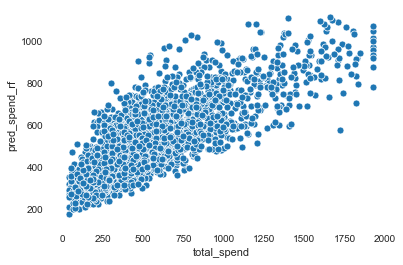

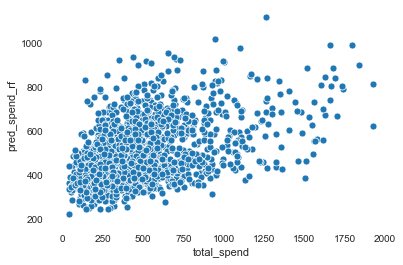

In [104]:
# d.2) Corelation between actual and predicted

sns.scatterplot(train.total_spend, train.pred_spend_rf)
plt.show()

sns.scatterplot(test.total_spend, test.pred_spend_rf)
plt.show()

In [105]:
# Step 6: accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_spend'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_spend'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = train[['Deciles', 'total_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['total_spend']
Decile_analysis_train = pd.concat([Actual_avg, Predicted_avg], axis = 1).reset_index()

# Decile Analysis for train data
Predicted_avg = test[['Deciles', 'pred_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = test[['Deciles', 'total_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['total_spend']
Decile_analysis_test = pd.concat([Actual_avg,Predicted_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('C:/Data Sets/(Class 21-Python - Case Study)/1. Predicting Credit Card Spend & Identifying Key Drivers/Decile_analysis_train.csv')
Decile_analysis_test.to_csv('C:/Data Sets/(Class 21-Python - Case Study)/1. Predicting Credit Card Spend & Identifying Key Drivers/Decile_analysis_test.csv')
Decile_analysis_train

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Deciles,total_spend,pred_spend
0,9,880.836098,793.749262
1,8,709.915565,622.500917
2,7,596.637185,542.727759
3,6,519.001490,466.809481
4,5,472.039723,397.334148
5,4,419.374765,359.980158
6,3,380.798910,336.586811
7,2,379.736532,316.266507
8,1,326.155197,288.648527
9,0,275.520969,237.140057


In [106]:
Decile_analysis_test

,Deciles,total_spend,pred_spend
0,9,808.940889,777.650535
1,8,684.850645,616.225974
2,7,560.366979,528.284035
3,6,504.606428,449.318921
4,5,464.542133,386.957524
5,4,423.061530,359.289753
6,3,397.261600,338.901609
7,2,387.451933,319.883504
8,1,343.697583,293.616967
9,0,259.381703,237.913876


Validating the performance of the model which had a low R Squared value

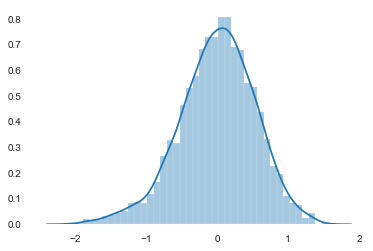

In [107]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm1.resid)
plt.show()

In [108]:
# assumption: mean of residuals/errors is zero
print(lm1.resid.mean())

-6.141119359069437e-17


In [109]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(lm1.resid, train.pred_spend))

(-0.005325633529266395, 0.7527932252207947)


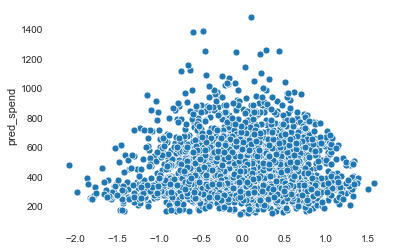

In [110]:
# assumption: homoscedasticity of residuals/errors
sns.scatterplot(lm1.resid, train.pred_spend)
plt.show()

In [111]:
#Adding final prediction column to original test file
 
pred_tot_spend= pd.DataFrame(np.exp(lm1.predict(X_final)), columns= {"pred_tot_spend": 0})


submission = pd.concat([credit_conti_vars, pred_tot_spend], axis=1)

submission.head()

,region,townsize,gender,age,ed,union,employ,retire,income,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,hometype,address,cars,carvalue,carbought,carbuy,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polview,vote,cardtype,cardfee,cardtenure,cardtenurecat,card2type,card2fee,card2tenure,active,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,...,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,homeown_1,carown_0,carown_1,cartype_0,cartype_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,pred_tot_spend
0,1,2.0,1,20,15,1,0,0,31.0,11.1,1.200909,2.240091,1,1,0,-1,3,0,0,0,0,0,0,0,0,2,0,2,14.3,0,0,22.0,0,1,1,0,0,0,0,1,0,0,6,1,1,0,2,2,3,0,3,0,5,1,6.50,34.40,1,29.0,161.05,1,...,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.007029,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,332.565546
1,5,5.0,0,22,17,0,0,0,15.0,18.6,1.222020,1.567980,1,1,0,-1,2,6,0,0,0,0,0,0,6,3,2,2,6.8,0,0,29.0,1,0,0,1,0,0,1,0,1,1,4,0,4,0,4,2,1,0,4,1,39,0,8.90,330.60,0,0.0,0.00,1,...,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,4.350794,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,363.218945
2,3,4.0,1,67,14,0,16,0,35.0,9.9,0.928620,2.536380,0,4,1,13,3,3,2,1,0,0,0,0,0,1,30,3,18.8,0,1,24.0,1,0,1,1,1,0,0,0,0,0,5,0,1,0,35,5,1,0,25,0,65,0,28.40,1858.35,0,0.0,0.00,0,...,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,5.886021,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,404.541251
3,4,3.0,0,23,16,0,0,0,20.0,5.7,0.033160,1.117200,1,2,1,18,5,0,0,0,0,0,0,0,0,3,3,3,8.7,0,1,38.0,1,0,0,0,0,0,0,0,0,0,3,0,1,0,5,2,2,0,5,1,36,0,6.00,199.45,0,0.0,0.00,0,...,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.884464,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,336.938334
4,2,2.0,0,26,16,0,1,0,23.0,1.7,0.214659,0.176341,0,1,1,13,4,0,0,0,0,0,0,0,0,2,3,1,10.6,0,1,32.0,0,0,0,0,0,1,0,1,0,0,4,0,2,0,8,3,3,0,9,1,21,0,3.05,74.10,1,16.5,387.70,0,...,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,6.230147,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,468.464833


In [112]:
submission[['total_spend','pred_tot_spend']]

,total_spend,pred_tot_spend
0,149.46,332.565546
1,77.54,363.218945
2,359.97,404.541251
3,359.41,336.938334
4,507.83,468.464833
...,...,...
4995,1425.67,832.470812
4996,366.35,441.417672
4997,1527.75,769.383062
4998,752.95,414.673224


In [113]:
writer = pd.ExcelWriter('Regression Output.xlsx')
submission.to_excel(writer, "Predictions", index=True)
submission.to_csv("C:/Data Sets/(Class 21-Python - Case Study)/1. Predicting Credit Card Spend & Identifying Key Drivers/Predictions.csv")

# Conclusions

Based on our regression analysis, the observed might be otherwise in case of outliers but is in accordance with majority.

    Retired customers tend to spend less.
    Credit spent on cards decreases with increase in number of years of service with the same employer
    Customers with "High" Debt to income ratio (%) spent a lot less as compared to those with "low" Debt to income    ratio (%)
    Customers with low credit card debt spent more as compared to those with high debt
    Customers with 13-17 years of education spend more on their credit cards as compared to those with less or more years of education
    Customers with less number of people in household tend to spend more, specially customers who were alone
    Customer with less number of cars tend to spend more


** Factors that do not influence credit spend except in case of outliers which we had removed:

    Income of the individual
    Job category of the individual
    Marital status of customers
    Birth month
